In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
img_height, img_width = 128, 128
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/SDP 400/Fruits Data set/Train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/SDP 400/Fruits Data set/Test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/SDP 400/Fruits Data set less/Test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1885 files belonging to 4 classes.
Found 425 files belonging to 4 classes.
Found 186 files belonging to 4 classes.


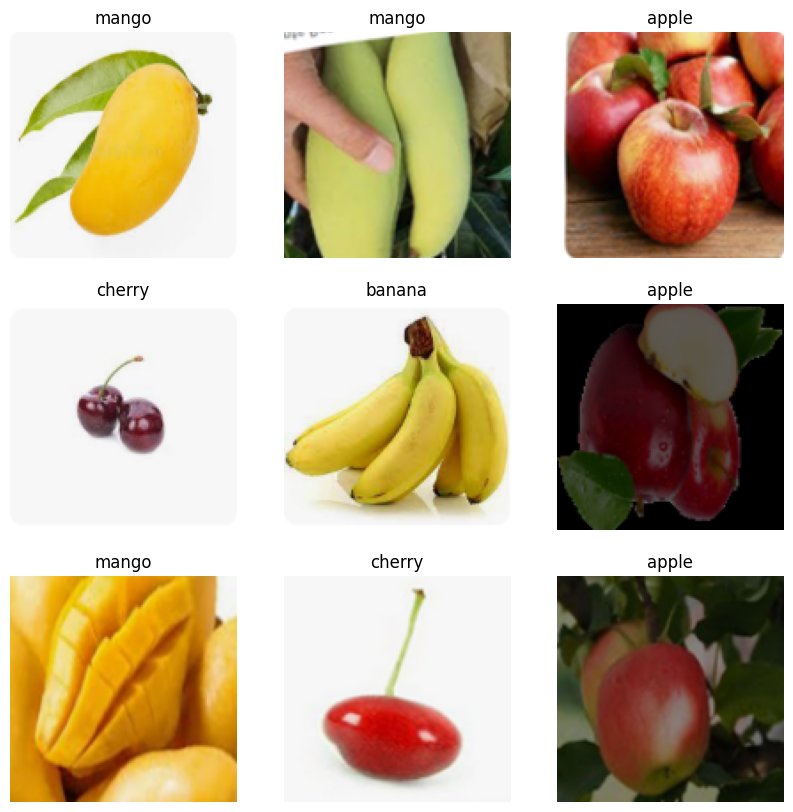

In [4]:
class_names = ["apple", "banana", "cherry","mango"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(128, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(256, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation="relu"),
     tf.keras.layers.Dense(4)
    ]
)


In [6]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [7]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
95/95 [==============================] - 283s 3s/step - loss: 1.2347 - accuracy: 0.4424 - val_loss: 0.9068 - val_accuracy: 0.5106
Epoch 2/10
95/95 [==============================] - 14s 133ms/step - loss: 0.8342 - accuracy: 0.6069 - val_loss: 0.7109 - val_accuracy: 0.7482
Epoch 3/10
95/95 [==============================] - 14s 138ms/step - loss: 0.6752 - accuracy: 0.7130 - val_loss: 0.7621 - val_accuracy: 0.6918
Epoch 4/10
95/95 [==============================] - 13s 133ms/step - loss: 0.5883 - accuracy: 0.7496 - val_loss: 0.6854 - val_accuracy: 0.7459
Epoch 5/10
95/95 [==============================] - 13s 132ms/step - loss: 0.4867 - accuracy: 0.8053 - val_loss: 0.7491 - val_accuracy: 0.7529
Epoch 6/10
95/95 [==============================] - 13s 132ms/step - loss: 0.4278 - accuracy: 0.8228 - val_loss: 0.7317 - val_accuracy: 0.7506
Epoch 7/10
95/95 [==============================] - 13s 131ms/step - loss: 0.3086 - accuracy: 0.8828 - val_loss: 0.7704 - val_accuracy: 0.7388
E

In [8]:
model.evaluate(test_ds)

10/10 [==============================] - 26s 127ms/step - loss: 1.3067 - accuracy: 0.7796


[1.3067268133163452, 0.7795698642730713]

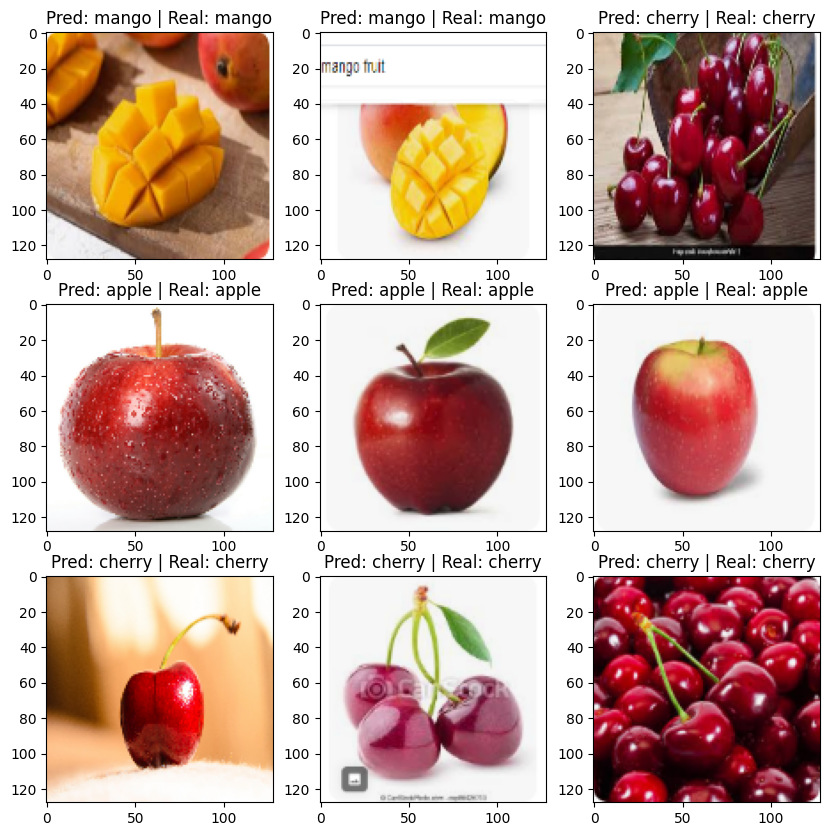

In [9]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)